In [1]:
import pandas as pd
import numpy as np
acs = pd.read_csv("./data/merge_ACS.csv")
acs_counts = acs['counts']
acs = acs.drop(['counts'], axis = 1)
acs['time'] = pd.to_datetime(acs['time'])
acs['counts'] = acs_counts
acs

FileNotFoundError: [Errno 2] No such file or directory: './data/merge_ACS.csv'

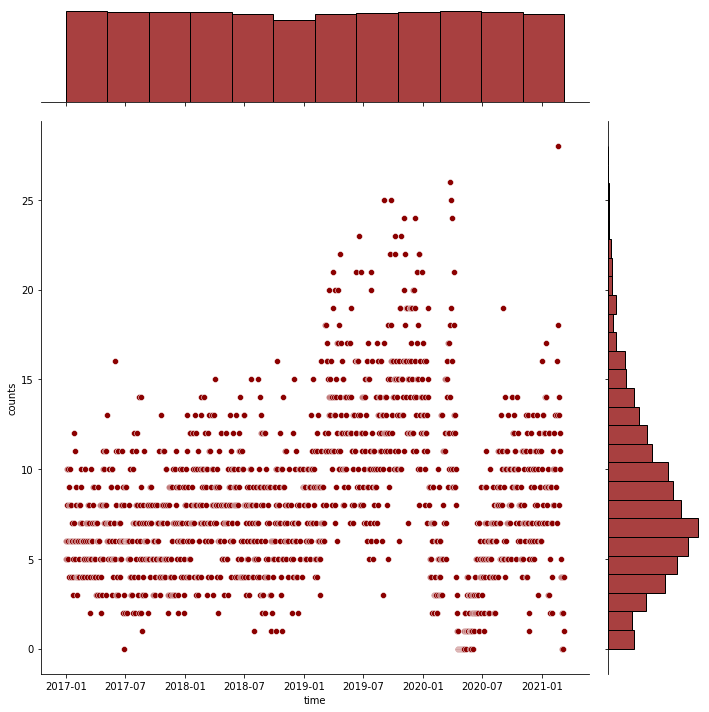

In [2]:
import seaborn as sns

sns.jointplot(x = 'time',y = 'counts', data=acs, height=10, color='#8B0000')

In [3]:
acs['counts'].describe()

count    1501.000000
mean        8.347768
std         4.450803
min         0.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        28.000000
Name: counts, dtype: float64

In [4]:
acs['counts'].value_counts()

7     169
6     151
8     138
5     130
9     123
10    113
4     107
11     82
12     74
3      72
13     59
14     49
2      46
15     34
16     33
0      26
1      24
17     15
19     15
18     10
20      7
21      7
22      6
23      3
25      3
24      3
26      1
28      1
Name: counts, dtype: int64

In [5]:
# 将当天即后三天相加，作为counts_3

# 舍弃当天的后两天之和， 也可行
for i in range(acs.shape[0] - 4):
    acs.iloc[i, -1] += acs.iloc[i+1, -1]
    acs.iloc[i, -1] += acs.iloc[i+2, -1]
    acs.iloc[i, -1] += acs.iloc[i+3, -1]
    acs.iloc[i, -1] += acs.iloc[i+4, -1]
acs

,time,AQI_mean,AQI_max,AQI_min,AQI_std,PM2_mean,PM2_max,PM2_min,PM2_std,PM10_mean,...,rain_3h_std_7,temp_sub_7,dew_temp_sub_7,press_sub_7,dir_sub_7,speed_sub_7,cloud_sub_7,rain_1h_sub_7,rain_3h_sub_7,counts
0,2017-01-01,229.736842,319,193,40.078870,179.894737,269,145,39.934522,227.894737,...,0.300972,201,193,138,340,50,9,0,3,35
1,2017-01-02,248.100000,286,222,19.174819,198.100000,236,172,19.174819,232.550000,...,0.000000,176,183,138,360,50,9,0,0,35
2,2017-01-03,123.583333,241,69,43.809783,93.375000,191,50,34.799816,120.583333,...,0.000000,172,183,135,360,50,9,0,0,35
3,2017-01-04,269.333333,393,206,48.792967,219.333333,343,156,48.792967,254.000000,...,0.000000,172,175,171,360,50,9,0,0,34
4,2017-01-05,276.000000,400,121,77.981603,228.625000,350,92,73.210722,308.291667,...,0.000000,175,180,239,360,40,9,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,2021-03-05,36.583333,155,25,29.435141,18.750000,95,8,18.467951,37.041667,...,5.850963,306,269,268,320,70,0,0,30,11
1497,2021-03-06,48.000000,81,33,13.344922,31.291667,60,18,11.914475,44.291667,...,5.850963,306,269,320,320,70,0,0,30,2
1498,2021-03-07,55.166667,79,36,13.602003,38.333333,58,25,11.346965,48.375000,...,4.270101,278,269,320,320,70,0,0,30,4
1499,2021-03-08,100.666667,134,76,18.719129,75.375000,102,56,15.015391,85.166667,...,1.093071,278,269,320,320,70,0,0,4,1


In [6]:
acs = acs.iloc[:-4, :]
acs

,time,AQI_mean,AQI_max,AQI_min,AQI_std,PM2_mean,PM2_max,PM2_min,PM2_std,PM10_mean,...,rain_3h_std_7,temp_sub_7,dew_temp_sub_7,press_sub_7,dir_sub_7,speed_sub_7,cloud_sub_7,rain_1h_sub_7,rain_3h_sub_7,counts
0,2017-01-01,229.736842,319,193,40.078870,179.894737,269,145,39.934522,227.894737,...,0.300972,201,193,138,340,50,9,0,3,35
1,2017-01-02,248.100000,286,222,19.174819,198.100000,236,172,19.174819,232.550000,...,0.000000,176,183,138,360,50,9,0,0,35
2,2017-01-03,123.583333,241,69,43.809783,93.375000,191,50,34.799816,120.583333,...,0.000000,172,183,135,360,50,9,0,0,35
3,2017-01-04,269.333333,393,206,48.792967,219.333333,343,156,48.792967,254.000000,...,0.000000,172,175,171,360,50,9,0,0,34
4,2017-01-05,276.000000,400,121,77.981603,228.625000,350,92,73.210722,308.291667,...,0.000000,175,180,239,360,40,9,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,2021-03-01,49.625000,133,24,31.556454,32.416667,101,8,26.735283,39.583333,...,5.846522,303,245,214,320,70,0,0,30,10
1493,2021-03-02,85.541667,143,31,35.288844,62.000000,109,19,29.641334,77.000000,...,5.849520,306,245,214,320,70,0,0,30,8
1494,2021-03-03,73.583333,120,31,33.989662,52.791667,91,18,28.174887,67.875000,...,5.849520,306,244,214,320,70,0,0,30,10
1495,2021-03-04,89.833333,148,51,34.320316,61.625000,113,36,25.779690,118.458333,...,5.846522,306,269,250,320,70,0,0,30,11


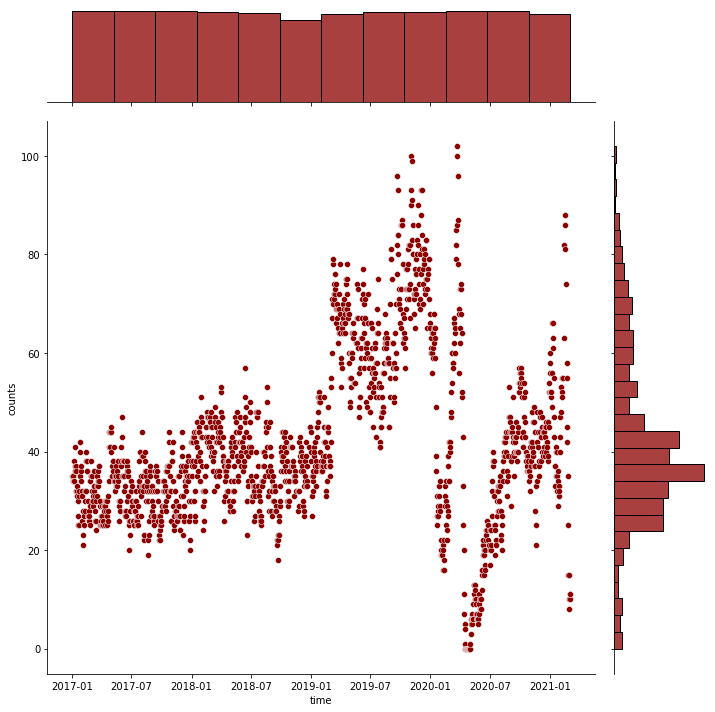

In [7]:
acs = acs.dropna(axis = 1)
sns.jointplot(x = 'time',y = 'counts', data=acs, height=10, color='#8B0000')

In [8]:
acs = acs[(acs['time'] < pd.to_datetime('2020/01/01')) | (acs['time'] > pd.to_datetime('2020/09/01'))]
acs

,time,AQI_mean,AQI_max,AQI_min,AQI_std,PM2_mean,PM2_max,PM2_min,PM2_std,PM10_mean,...,rain_3h_std_7,temp_sub_7,dew_temp_sub_7,press_sub_7,dir_sub_7,speed_sub_7,cloud_sub_7,rain_1h_sub_7,rain_3h_sub_7,counts
0,2017-01-01,229.736842,319,193,40.078870,179.894737,269,145,39.934522,227.894737,...,0.300972,201,193,138,340,50,9,0,3,35
1,2017-01-02,248.100000,286,222,19.174819,198.100000,236,172,19.174819,232.550000,...,0.000000,176,183,138,360,50,9,0,0,35
2,2017-01-03,123.583333,241,69,43.809783,93.375000,191,50,34.799816,120.583333,...,0.000000,172,183,135,360,50,9,0,0,35
3,2017-01-04,269.333333,393,206,48.792967,219.333333,343,156,48.792967,254.000000,...,0.000000,172,175,171,360,50,9,0,0,34
4,2017-01-05,276.000000,400,121,77.981603,228.625000,350,92,73.210722,308.291667,...,0.000000,175,180,239,360,40,9,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,2021-03-01,49.625000,133,24,31.556454,32.416667,101,8,26.735283,39.583333,...,5.846522,303,245,214,320,70,0,0,30,10
1493,2021-03-02,85.541667,143,31,35.288844,62.000000,109,19,29.641334,77.000000,...,5.849520,306,245,214,320,70,0,0,30,8
1494,2021-03-03,73.583333,120,31,33.989662,52.791667,91,18,28.174887,67.875000,...,5.849520,306,244,214,320,70,0,0,30,10
1495,2021-03-04,89.833333,148,51,34.320316,61.625000,113,36,25.779690,118.458333,...,5.846522,306,269,250,320,70,0,0,30,11


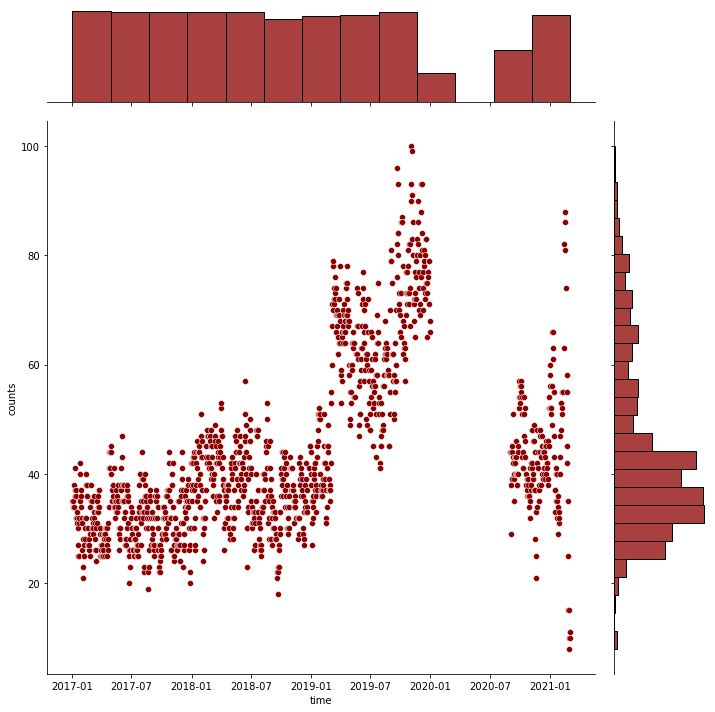

In [9]:
sns.jointplot(x = 'time',y = 'counts', data=acs, height=10, color='#8B0000')

In [10]:
acs['counts'].describe()

count    1252.000000
mean       43.731629
std        15.862867
min         8.000000
25%        33.000000
50%        39.000000
75%        51.000000
max       100.000000
Name: counts, dtype: float64

In [11]:
# acs = acs.drop(['time'], axis = 1)
# 四分位数
p_25, p_75 = acs['counts'].quantile([0.25, 0.75])
print(p_25, p_75)

def filt(x, p25, p75):
    if x<=p25:
        return 0
    elif x>=p75:
        return 1
    else:
        return 2
acs['counts'] = acs.counts.apply(lambda x: filt(x, p_25, p_75))

acs = acs[(acs['counts'] == 1) | (acs['counts'] == 0)]
acs

33.0 51.0


,time,AQI_mean,AQI_max,AQI_min,AQI_std,PM2_mean,PM2_max,PM2_min,PM2_std,PM10_mean,...,rain_3h_std_7,temp_sub_7,dew_temp_sub_7,press_sub_7,dir_sub_7,speed_sub_7,cloud_sub_7,rain_1h_sub_7,rain_3h_sub_7,counts
11,2017-01-12,69.166667,143,25,34.521155,49.791667,109,15,27.958011,67.208333,...,0.000000,210,149,232,360,70,9,0,0,0
13,2017-01-14,44.541667,65,29,11.912650,30.250000,47,18,9.469631,42.791667,...,0.133631,180,148,202,360,70,9,0,1,0
14,2017-01-15,71.750000,202,26,48.746237,52.000000,152,17,37.973675,68.333333,...,0.133631,180,148,191,360,70,9,0,1,0
15,2017-01-16,228.875000,405,108,79.995278,183.500000,357,81,74.956219,203.958333,...,0.133631,159,120,249,320,70,9,0,1,0
16,2017-01-17,318.583333,453,183,69.448709,271.041667,430,138,73.371881,288.166667,...,0.133631,171,138,256,320,50,9,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,2021-03-01,49.625000,133,24,31.556454,32.416667,101,8,26.735283,39.583333,...,5.846522,303,245,214,320,70,0,0,30,0
1493,2021-03-02,85.541667,143,31,35.288844,62.000000,109,19,29.641334,77.000000,...,5.849520,306,245,214,320,70,0,0,30,0
1494,2021-03-03,73.583333,120,31,33.989662,52.791667,91,18,28.174887,67.875000,...,5.849520,306,244,214,320,70,0,0,30,0
1495,2021-03-04,89.833333,148,51,34.320316,61.625000,113,36,25.779690,118.458333,...,5.846522,306,269,250,320,70,0,0,30,0


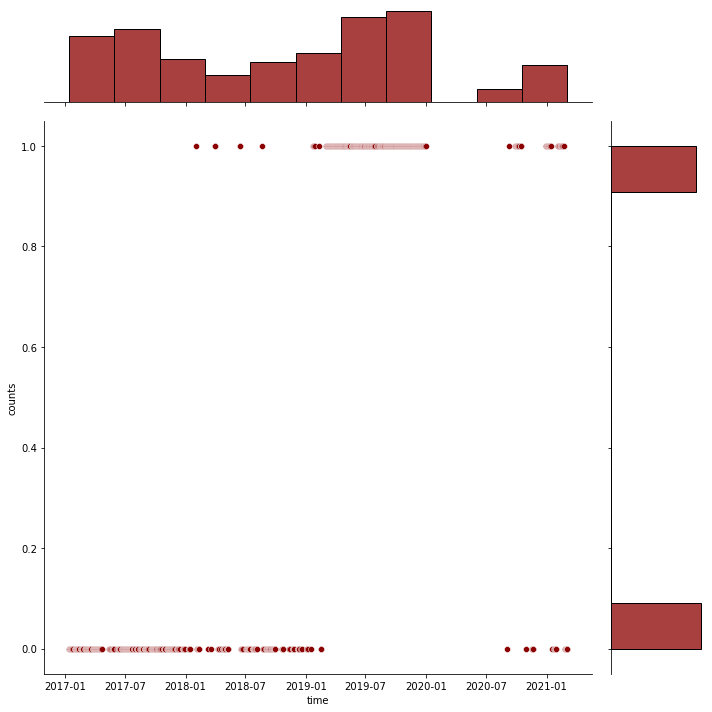

In [12]:
sns.jointplot(x = 'time',y = 'counts', data=acs, height=10, color='#8B0000')
# acs.to_csv("./acs_genetic.csv", index=False)

In [13]:
acs = acs.drop(['time'], axis = 1)
acs['counts'].value_counts()

0    348
1    328
Name: counts, dtype: int64

In [14]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

def eval(clf, X_train, X_test, y_train, y_test):
    predicted = clf.predict(X_train)
    accu = accuracy_score(y_train, predicted)
    print("训练集准确率：", accu)
    f1 = f1_score(y_train, predicted, average="macro")
    print("训练集f1：", f1)

    predicted = clf.predict(X_test)
    accu = accuracy_score(y_test, predicted)
    print("测试集准确率：", accu)
    f1 = f1_score(y_test, predicted, average="macro")
    print("测试集f1：", f1)

train_x, test_x, train_y, test_y = train_test_split(acs.iloc[:, :-1], acs.iloc[:, -1], shuffle=True, test_size=0.3)
print("train shape",train_x.shape)
print("test shape",test_x.shape)


train shape (473, 211)
test shape (203, 211)


In [15]:
print(test_x.columns)

Index(['AQI_mean', 'AQI_max', 'AQI_min', 'AQI_std', 'PM2_mean', 'PM2_max',
       'PM2_min', 'PM2_std', 'PM10_mean', 'PM10_max',
       ...
       'rain_3h_mean_7', 'rain_3h_std_7', 'temp_sub_7', 'dew_temp_sub_7',
       'press_sub_7', 'dir_sub_7', 'speed_sub_7', 'cloud_sub_7',
       'rain_1h_sub_7', 'rain_3h_sub_7'],
      dtype='object', length=211)


In [16]:
# 随机森林===========================
params = {'n_estimators':[40,60,70],'max_depth':[4,5,6,7],
          'criterion':['entropy'],"class_weight":[ 'balanced'],"random_state":[1]}

clf = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,cv = 5,n_jobs = -1,scoring="f1_macro")
clf.fit(train_x, train_y)  # 模型训练完毕
print("Best Params:{}".format(clf.best_params_))

rdf = RandomForestClassifier(n_estimators=clf.best_params_['n_estimators'], criterion="entropy", random_state =1, max_depth=clf.best_params_['max_depth'], class_weight="balanced")
rdf.fit(train_x, train_y)
eval(rdf, train_x, test_x,train_y,  test_y)

Best Params:{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 40, 'random_state': 1}
训练集准确率： 0.9830866807610994
训练集f1： 0.9830866051634126
测试集准确率： 0.9113300492610837
测试集f1： 0.9112762237762237


In [17]:
print(list(rdf.predict(test_x)))

print(list(test_y))

[1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0]
[1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,

In [18]:
print(accuracy_score(rdf.predict(test_x), test_y))

0.9113300492610837


In [19]:
important_fea = list(rdf.feature_importances_)
fea = []
for idx in range(20):
    impor = max(important_fea)
    index = important_fea.index(impor)
    fea.append((index, impor))
    important_fea[index] = -999

selected_features = []
for i in range(len(fea)):
    print(
        '第', i+1, '个重要的元素是', train_x.columns[fea[i][0]], '重要性为', fea[i][1]
    )
    selected_features.append(train_x.columns[fea[i][0]])

第 1 个重要的元素是 NO2_7days_min 重要性为 0.05719704378885565
第 2 个重要的元素是 SO2_7days_min 重要性为 0.04091895347589162
第 3 个重要的元素是 CO_7days_min 重要性为 0.035545548791925945
第 4 个重要的元素是 SO2_7days_std 重要性为 0.03490558616665803
第 5 个重要的元素是 SO2_7days_mean 重要性为 0.027198701208561542
第 6 个重要的元素是 cloud_mean_7 重要性为 0.026974661731478018
第 7 个重要的元素是 NO2_min 重要性为 0.025015350432995714
第 8 个重要的元素是 CO_7days_mean 重要性为 0.023427028234669616
第 9 个重要的元素是 NO2_3days_min 重要性为 0.02274321804538585
第 10 个重要的元素是 NO2_7days_mean 重要性为 0.022389276690883128
第 11 个重要的元素是 SO2_3days_std 重要性为 0.021788145268228656
第 12 个重要的元素是 SO2_3days_min 重要性为 0.02176477303128558
第 13 个重要的元素是 NO2_7days_std 重要性为 0.01956575534768926
第 14 个重要的元素是 SO2_7days_max 重要性为 0.017124934527625084
第 15 个重要的元素是 O3_3days_mean 重要性为 0.015961347295365427
第 16 个重要的元素是 O3_7days_min 重要性为 0.014762277303839933
第 17 个重要的元素是 SO2_3days_mean 重要性为 0.013996177483465311
第 18 个重要的元素是 SO2_max 重要性为 0.013169803371147027
第 19 个重要的元素是 PM10_7days_max 重要性为 0.012581529991579004
第 20 个重要的元素是 SO2_st

In [20]:
import graphviz
from sklearn import tree

Estimators = rdf.estimators_
clf = Estimators[0]
# dot_data = tree.export_graphviz(clf, out_file = None)
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("clf")


'clf.pdf'

In [21]:
selected_features

['NO2_7days_min',
 'SO2_7days_min',
 'CO_7days_min',
 'SO2_7days_std',
 'SO2_7days_mean',
 'cloud_mean_7',
 'NO2_min',
 'CO_7days_mean',
 'NO2_3days_min',
 'NO2_7days_mean',
 'SO2_3days_std',
 'SO2_3days_min',
 'NO2_7days_std',
 'SO2_7days_max',
 'O3_3days_mean',
 'O3_7days_min',
 'SO2_3days_mean',
 'SO2_max',
 'PM10_7days_max',
 'SO2_std']

In [22]:
train_x, test_x, train_y, test_y = train_test_split(acs.loc[:,selected_features], acs.iloc[:, -1], shuffle=True, test_size=0.3)
print("train shape",train_x.shape)
print("test shape",test_x.shape)

print(train_x)

train shape (473, 20)
test shape (203, 20)
     NO2_7days_min  SO2_7days_min  CO_7days_min  SO2_7days_std  \
361             19             25          0.49      19.151946   
961              7              6          0.33       1.896050   
807             12              7          0.40       6.307816   
400             22             21          0.33      17.379606   
11              19             15          0.83      37.634423   
..             ...            ...           ...            ...   
904             12              6          0.33       2.092861   
176             13              6          0.42       1.673752   
145             10              5          0.43       2.422977   
265             11              5          0.34       2.468272   
718             16             19          0.43      11.511400   

     SO2_7days_mean  cloud_mean_7  NO2_min  CO_7days_mean  NO2_3days_min  \
361       53.976190      5.250000       47       1.215000             19   
961        8

In [23]:

# 随机森林===========================
params = {'n_estimators':[100,150,200],'max_depth':[6,7,8,9],
          'criterion':['entropy'],"class_weight":[ 'balanced'],"random_state":[1]}

clf = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,cv = 5,n_jobs = -1,scoring="f1_macro")
clf.fit(train_x, train_y)  # 模型训练完毕
print("Best Params:{}".format(clf.best_params_))

rdf = RandomForestClassifier(n_estimators=clf.best_params_['n_estimators'], criterion="entropy", random_state =1, max_depth=clf.best_params_['max_depth'], class_weight="balanced")
rdf.fit(train_x, train_y)
eval(rdf, train_x, test_x,train_y,  test_y)

Best Params:{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 100, 'random_state': 1}
训练集准确率： 0.9936575052854123
训练集f1： 0.993641134109781
测试集准确率： 0.9359605911330049
测试集f1： 0.9359543744691179


In [24]:
important_fea2 = list(rdf.feature_importances_)
fea = []
for idx in range(20):
    impor = max(important_fea2)
    index = important_fea2.index(impor)
    fea.append((index, impor))
    important_fea2[index] = -999

# selected_features = []
for i in range(len(fea)):
    print(
        '第', i+1, '个重要的元素是', train_x.columns[fea[i][0]], '重要性为', fea[i][1]
    )
    # selected_features.append(train_x.columns[fea[i][0]])

第 1 个重要的元素是 NO2_7days_min 重要性为 0.10640613796311472
第 2 个重要的元素是 SO2_7days_mean 重要性为 0.09037070967323642
第 3 个重要的元素是 SO2_7days_min 重要性为 0.08410770733080952
第 4 个重要的元素是 SO2_3days_min 重要性为 0.07323681986258332
第 5 个重要的元素是 SO2_7days_std 重要性为 0.07198864584654997
第 6 个重要的元素是 NO2_7days_mean 重要性为 0.06317604748986493
第 7 个重要的元素是 SO2_3days_mean 重要性为 0.05597054828053499
第 8 个重要的元素是 cloud_mean_7 重要性为 0.05172046542408171
第 9 个重要的元素是 NO2_3days_min 重要性为 0.0479942869409151
第 10 个重要的元素是 SO2_3days_std 重要性为 0.04735729268177212
第 11 个重要的元素是 NO2_7days_std 重要性为 0.04043123378223609
第 12 个重要的元素是 O3_7days_min 重要性为 0.038805634160747886
第 13 个重要的元素是 O3_3days_mean 重要性为 0.0379687264632284
第 14 个重要的元素是 PM10_7days_max 重要性为 0.03697714742282928
第 15 个重要的元素是 SO2_7days_max 重要性为 0.03260662654004126
第 16 个重要的元素是 CO_7days_mean 重要性为 0.032095268248718646
第 17 个重要的元素是 CO_7days_min 重要性为 0.03174363284956088
第 18 个重要的元素是 NO2_min 重要性为 0.02509203087819486
第 19 个重要的元素是 SO2_max 重要性为 0.01681863101737855
第 20 个重要的元素是 SO2_std 重要性为 0.0151

In [25]:
# # 随机森林可视化
# import pydotplus
# from IPython.display import Image
# Estimators = rdf.estimators_
# for index, model in enumerate(Estimators):
#     filename = 'iris_' + str(index) + '.pdf'
#     dot_data = tree.export_graphviz(model , out_file=None,
#                          feature_names=acs.columns[:-1],
#                          class_names=acs.columns[-1],
#                          filled=True, rounded=True,
#                          special_characters=True)
#     graph = pydotplus.graph_from_dot_data(dot_data)
#     # 使用ipython的终端jupyter notebook显示。
#     Image(graph.create_png())
#     graph.write_pdf(filename)

## 总结

使用后几天counts之和做 预测时，f1_score和accu都能达到0.88以上。